## Keras: A high level neural network library

In this exercise we will revisit classification using simple neural networks. To do so we will use Keras, a popular neural network package. Keras is a high level library that allows rapid prototyping of neural networks due to its precompiled layers, just as Scikit-learn contains a number of prebuilt classifiers.


## Keras

Detailed instructions can be found at https://keras.io.


To start the demo, we have a 2D dataset so we can visualize what the network is doing.

Neural networks are so popular now due to their ability to quickly learn nonlinear boundaries. So, we have an example that would be impossible for a linear classifier and demonstrate how a neural network can be used to solve this. As you can see, in the dataset below there is no straight line that you can draw that perfectly separates the red and blue classes

In [1]:
from google.colab import files
src = list(files.upload().values())[0]
open('utils.py','wb').write(src)
import utils

Saving utils.py to utils.py


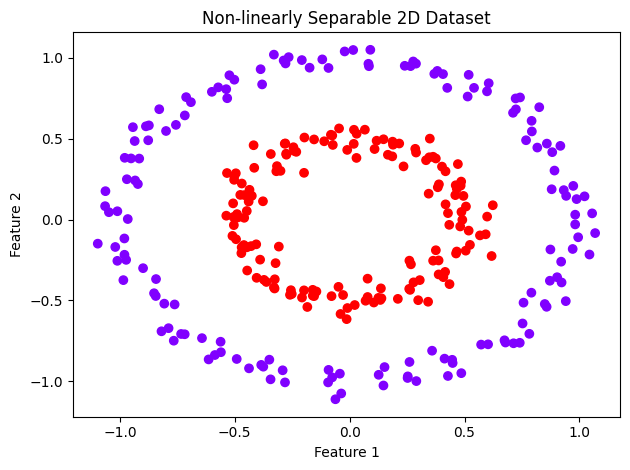

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import numpy as np

# Generate a non-linearly separable dataset
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Function to get consistent colors for plotting
def get_colors(y):
    # Map unique labels to colors
    unique_labels = np.unique(y)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    color_map = {label: color for label, color in zip(unique_labels, colors)}
    return [color_map[label] for label in y]

cmap = get_colors(y)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=cmap)
plt.title("Non-linearly Separable 2D Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

Let's split it into a training and testing set

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

We will build a Perceptron using Keras as an example-- Recall that a perceptron is a 0 hidden layer neural network with a single output unit. In Keras terms, it's a single Dense layer with 1 unit.

We will build this perceptron with a sigmoidal output (so it outputs a probability of class 1) and the binary_crossentropy loss function (which corresponds to sigmoid).

In [4]:
# Relevant imports
import tensorflow as tf
from keras.models import Sequential
# Keras refers to an architecture in which the outputs of
# one layer are the inputs to the next as "Sequential"
from keras.layers import Dense
# Everything we've talked about in class so far is referred to in
# Keras as a "dense" connection between layers, where every input
# unit connects to a unit in the next layer
from tensorflow.keras.optimizers.legacy import SGD
# SGD is the learning algorithm we will use

# Exercise 1:

Q1. Let's first create neural network with 1 layer

To add a layer to the architecture, you would simply use .add(LAYER).

Each "input_dim" of each layer should be the number units in the previous layer (in this case the input), and the number of "units" should be the number of outputs of the layer (in this case it will be 1).

In [5]:
perceptron = Sequential()
perceptron.add(Dense(units=1, input_dim=2, activation='sigmoid'))

Now we specify how to optimize the neural network. We mentioned gradient descent and stochastic gradient descent in class. Let's use the latter here and compile the model. We also specify the loss function as "binary_crossentropy".

In [6]:
sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
perceptron.compile(loss="binary_crossentropy", optimizer=sgd)

Q2. Now we train the built perceptron with appropriate epochs and batch_size.

In [7]:
perceptron.fit(X_train, y_train, batch_size = 32, epochs= 100)

Epoch 1/100
8/8 [==============================] - 1s 8ms/step - loss: 0.7433
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.7430
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 0.7426
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.7422
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.7417
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.7411
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.7406
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 0.7401
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7396
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 0.7391
Epoch 11/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7386
Epoch 12/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7382
Epoch 13/100
8/8 [==============================] - 0s 4ms/st

Q3. Compute accuracy by implementing your own function.

In [8]:
y_preds = perceptron.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [9]:
### Build your own function to calculate accuracy###
def accuracy(y, y_preds):
    # Convert predicted probabilities to binary values (0 or 1)
    y_pred_binary = (y_preds > 0.5).astype(int)

    # Compare with true labels and calculate accuracy
    accuracy = np.mean(y == y_pred_binary)
    return accuracy

In [10]:
print(f'The accuracy is: {accuracy(y_test, y_preds)}')

The accuracy is: 0.5


57/57 [==============================] - 0s 1ms/step


Text(22.347222222222214, 0.5, 'Test')

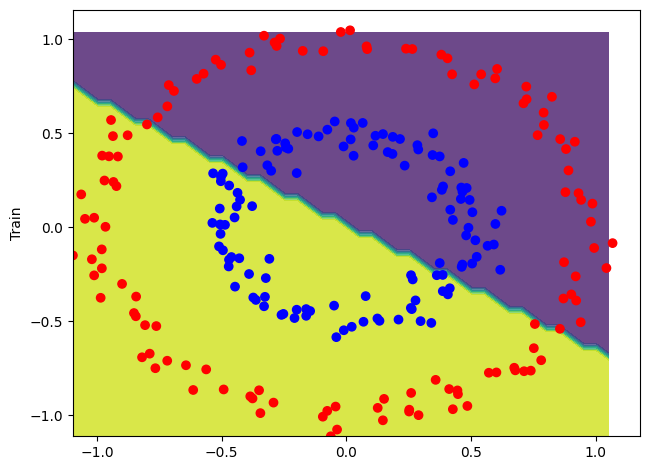

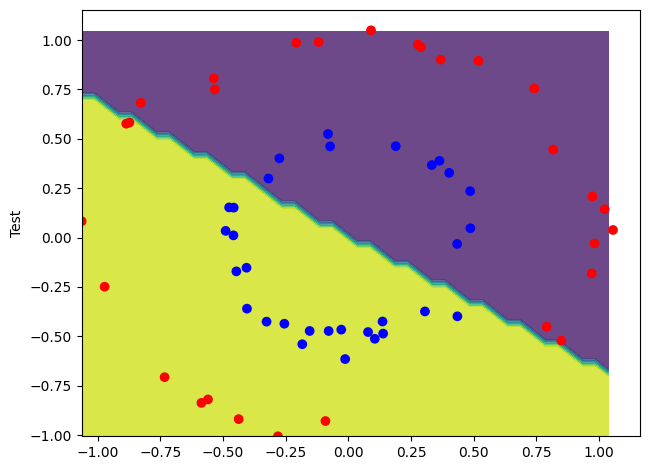

In [11]:
from utils import visualize_2d_classification
f, ax = visualize_2d_classification(perceptron, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(perceptron, X_test, y_test)
ax.set_ylabel("Test")

Recall that a perceptron is nothing more than a linear classifier, which is trying to separate our data using a line. It turns out that the introduction of hidden layers allows us to draw "lines" in higher dimensions, which, when mapped back into our original 2d space,  may look nonlinear.

# Exercise 2:

For this exercise, use Keras to create a 2-layer neural network by completing build_one_output_model(). We will then add one hidden layer of 2 units and an output layer of 1 unit (corresponding to our classes- sometimes referred to as a "readout" layer).

The model has already been initialized and the optimizer and loss function have been defined for you.

For your intermediate layers, use "relu" as the activation function, and "sigmoid" (as the demo above) for your output layer.

In [12]:
# Keras uses the Sequential model for linear stacking of layers.
# That is, creating a neural network is as easy as (later)
# defining the layers!
from keras.models import Sequential
# Everything we've talked about in class so far is referred to in
# Keras as a "dense" connection between layers, where every input
# unit connects to a unit in the next layer

from keras.layers import Dense
# SGD is the learning algorithm we will use
from tensorflow.keras.optimizers.legacy import SGD as SGD
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Q1. Create a 2 layer neural network by completing build_one_output_model().

In [13]:
def build_one_output_model():
    model = Sequential()

    # Add a input hidden layer with 2 units
    model.add(Dense(2, activation='relu'))

    # Add a final output layer with 1 unit
    model.add(Dense(1, activation='sigmoid'))

    # Specify SGD optimizer with appropriate values in learning_rate, decay and momentum.
    optimizer = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)

    # compile the model with "binary_crossentropy" loss and SGD optimizer.
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [14]:
model = build_one_output_model()

Q2. Fit your model by training set with appropriate epochs and batch_size.

In [15]:
epochs = 500
batch_size = 32

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/500
8/8 [==============================] - 1s 3ms/step - loss: 0.6900 - accuracy: 0.5125
Epoch 2/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5125
Epoch 3/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.5125
Epoch 4/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5125
Epoch 5/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.5125
Epoch 6/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.5125
Epoch 7/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5125
Epoch 8/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5125
Epoch 9/500
8/8 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5125
Epoch 10/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5125
Epoch 11/500
8/8 [===========

Q3. Compute accuracy by using your own function.

In [16]:
y_preds = model.predict(X_test)
print(f'The accuracy is: {accuracy(y_test, y_preds)}')

2/2 [==============================] - 0s 6ms/step
The accuracy is: 0.5044444444444445


57/57 [==============================] - 0s 1ms/step


Text(22.347222222222214, 0.5, 'Test')

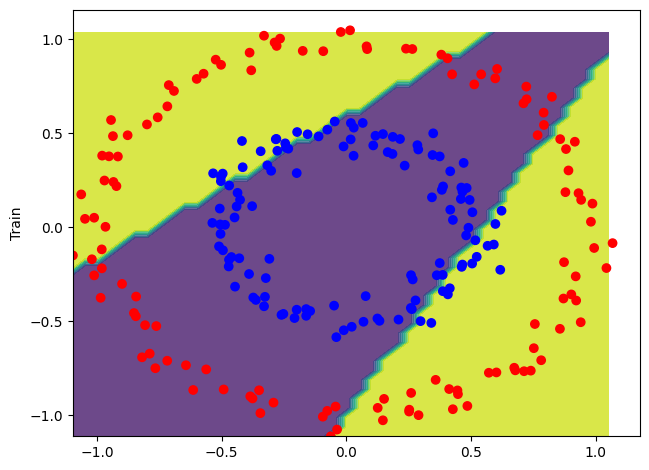

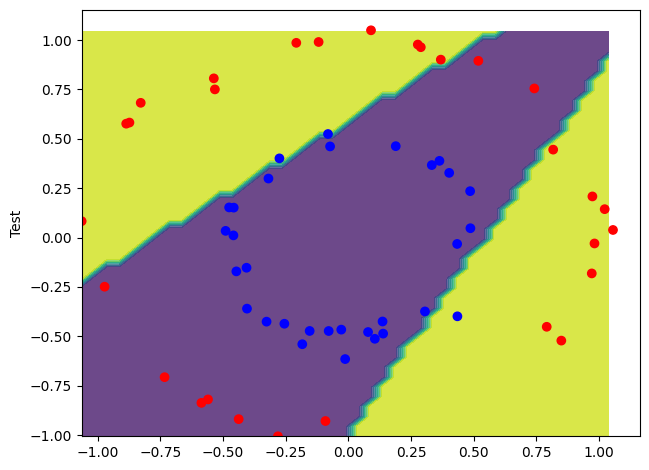

In [17]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")

It is actually quite rare for a classification neural network to have a single output unit as we've implemented above. Usually we have a $k$ unit output layer, where $k$ is the number of classes. This is typically done because when combined with the "softmax" activation function , the activity of each unit corresponds with the probability of that class. This allows us to easily extend to multiclass classification.

Now we will still work with two units, but map them to two output units rather than 1. class 0 will be [1, 0], and class 1 will be [0, 1]. This operation is referred to as "one hot encoding".

In [18]:
# Before we can fit the network, we need to one-hot vectorize our response.
# There is a keras method for that.
from tensorflow.keras.utils import to_categorical
y_train_vectorized = to_categorical(y_train)

In [19]:
print("Label | One-hot")
for i in range(10):
    print("{} | {}".format(y_train[i], y_train_vectorized[i]))

Label | One-hot
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]


The one hot encoded vectors will serve as future labels for our models.

# Exercise 3:

Q1.Implement build_classification_model() that returns a sequential model that takes an input of size 2, passes it to a hidden layer of size 10, then a hidden layer of size 5, then a readout layer of size 2.


As before, use the "relu" activation function for hidden layers, but since we have multiple output units, use the "softmax" activation for the final layer.

We use SGD optimizer and "categorical_crossentropy" loss function to compile the model.

In [20]:
def build_classification_model():
    model = Sequential()

    # Add a hidden layer of size 10 that takes an input of size 2, and use the "relu" activation
    model.add(Dense(10, input_dim=2, activation='relu'))

    # Add a hidden layer of size 5, and use the "relu" activation
    model.add(Dense(5, activation='relu'))

    # Add a readout layer of size 2, and use the "softmax" activation
    model.add(Dense(2, activation='softmax'))

    # Specify SGD optimizer with appropriate values in learning_rate, decay and momentum.
    sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=0.9)

    # Use SGD optimizer and "categorical_crossentropy" loss function to compile the model.
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [21]:
model = build_classification_model()

Q2. Fit your model by training set

In [22]:
model.fit(X_train, y_train_vectorized, epochs=400, batch_size=32)

Epoch 1/400
8/8 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.5042
Epoch 2/400
8/8 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.5042
Epoch 3/400
8/8 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.5042
Epoch 4/400
8/8 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.5042
Epoch 5/400
8/8 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.5083
Epoch 6/400
8/8 [==============================] - 0s 3ms/step - loss: 0.6817 - accuracy: 0.5125
Epoch 7/400
8/8 [==============================] - 0s 3ms/step - loss: 0.6811 - accuracy: 0.5167
Epoch 8/400
8/8 [==============================] - 0s 3ms/step - loss: 0.6804 - accuracy: 0.5208
Epoch 9/400
8/8 [==============================] - 0s 3ms/step - loss: 0.6798 - accuracy: 0.5208
Epoch 10/400
8/8 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.5208
Epoch 11/400
8/8 [===========

Q3. Compute accuracy by using your own function

In [23]:
y_preds = model.predict(X_test)
print(f'The accuracy is: {accuracy(y_test, y_preds[:,1])}')

2/2 [==============================] - 0s 5ms/step
The accuracy is: 1.0


57/57 [==============================] - 0s 1ms/step


Text(22.347222222222214, 0.5, 'Test')

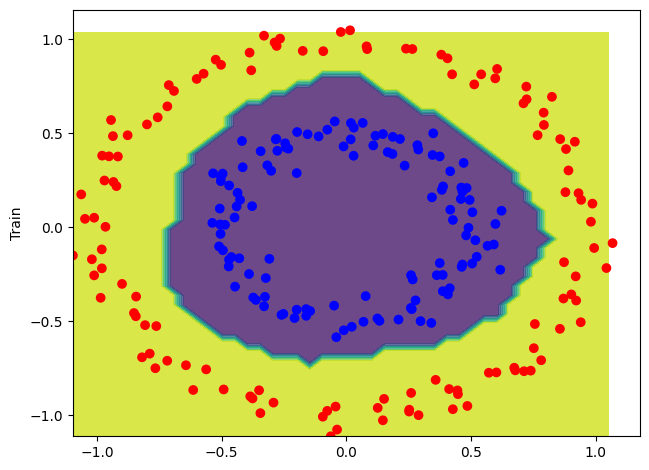

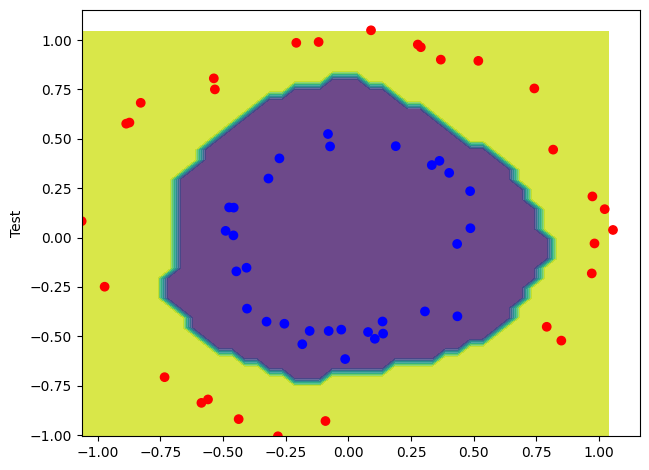

In [24]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")

# Exercise 4:
### Short answer-questions

Q1. The learning rate is an important parameter for gradient descent. Please briefly describe a possible issue if we choose too high a learning rate for full batch gradient descent (GD). Also, please briefly describe a possible issue if we choose too high a learning
rate for stochastic gradient descent (SGD), but is not a problem in the full batch setting.

Ans-

Full batch gradient descent (GD):

If we choose a high learning rate for GD, we might not be able to maintain stability in the face of the variance in estimating the gradient. The model might diverge rather than converging to the optimal solution.


Stochastic gradient descent (SGD):

For SGD, we face the same problem as for GD. SGD might reach the vicinity of the cost function’s minimum and then roams around it. SGD may fail to settle at a stable solution. This issue is more pronounced in SGD compared to full batch GD due to the noisy nature of individual data point updates.

Q2. Please give an example in the data augmentation methods that is helpful for classifying images of dogs and cats, but not for classifying handwritten digit.

Ans-

Horizontal Flipping (Mirroring)

If we horizontally flip images of dogs and cats, we can have more samples with which to train the classifier, leading to better generalization to unseen samples. After the flip, a dog or cat is still a dog or cat. Animals can have different characteristics for their left and right bodies, and horizontal flipping helps the model to recognize these diffrences.

However, if we horizontally flip handwritten digits, a hand written digit is no longer a digit. This might introduce bias and variance into the training data. In real life, a mirrored digit is not common. There is no point in training the model with flipped digits.

Q3. Suppose we have the following two neural networks containing fully-connected layers only.
<div>
<img src="https://ucla.box.com/shared/static/kgninjcbqpztz680q47emsluvituw4ga.jpg" width="300"/>
</div>
Please give one advantage of A over B, and one advantage of B over A.

Ans-


Advantage of A over B:
Network A can potentially train faster and avoid overfitting, especially when the available training data is limited.


Advantage of B over A:
Network B has the capacity for hierarchical feature learning, making it suitable for tasks where capturing complex patterns in a hierarchical manner is important.

# Exercise 5:

Now let's revisit the classification problem (Dataset 1) in Homework 2. Build a neural network to predict the output in the default payment dataset. The architecture choice is up to you, but you are required to use Dense layers and dropout layers only.

"CreditDefault_training.csv" has 3985 records.

"CreditDefault_Xtest.csv" contains contains 1000 rows and 14 columns. This is the test set which only contains the features.

Q1. Read the data<br/>
- Apply standardization to continuous values<br/>
- Convert categorical variables and the target "default.payment.next.month" into one-hot encodings. <br>
- Split data into train and validation set<br/>

In [25]:
import numpy as np
import pandas as pd
from google.colab import files
import io

In [26]:
# Load the Credit Default training dataset
uploaded = files.upload()
df_train = pd.read_csv(io.BytesIO(uploaded['CreditDefault_training.csv']))

Saving CreditDefault_training.csv to CreditDefault_training.csv


In [27]:
# Split training data into X (features) and y (target)
# Assuming the file name is 'CreditDefault_training.csv'
X = df_train.drop('default.payment.next.month', axis=1)  # Features
y = df_train['default.payment.next.month']               # Target

In [28]:
# Load test data set
uploaded = files.upload()
X_test = pd.read_csv(io.BytesIO(uploaded['CreditDefault_Xtest.csv']))

Saving CreditDefault_Xtest.csv to CreditDefault_Xtest.csv


In [29]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Separating categorical and continuous features
columns_encode = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
continuous_features = list(set(X.columns) - set(columns_encode))

# Standardization of continuous numerical features
sc = StandardScaler()
X[continuous_features] = sc.fit_transform(X[continuous_features])
X_test[continuous_features] = sc.transform(X_test[continuous_features])

# One-hot encoding for training dataset features
pay_categories = [[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]] * 6
encoder = OneHotEncoder(categories=[[1, 2],  # SEX
                                    [1, 2, 3, 4, 5, 6],  # EDUCATION
                                    [1, 2, 3],  # MARRIAGE
                                    *pay_categories],  # PAY_1 to PAY_6
                       sparse_output=False)

encoded_columns = encoder.fit_transform(X[columns_encode])
encoded_X = pd.DataFrame(encoded_columns, columns = encoder.get_feature_names_out(columns_encode))
X = pd.concat([X.drop(columns_encode, axis=1), encoded_X], axis=1)

# One-hot encoding for test dataset
encoded_columns = encoder.transform(X_test[columns_encode])
encoded_test = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_encode))
X_test = pd.concat([X_test.drop(columns_encode, axis=1), encoded_test], axis=1)

In [30]:
print('Shape of X (features): ', X.shape)
print('Shape of y (target): ', y.shape)
print('Shape of X_test: ', X_test.shape)

Shape of X (features):  (3985, 97)
Shape of y (target):  (3985,)
Shape of X_test:  (1000, 97)


In [31]:
# Split data into training and validation set (the code has been provided)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# One-hot vectorizing the response variables (y_train & y_val)
y_train_vector = to_categorical(y_train)
y_val_vector = to_categorical(y_val)

print('Shape of y (train): ', y_train_vector.shape)
print('Shape of y (test): ', y_val_vector.shape)

Shape of y (train):  (2789, 2)
Shape of y (test):  (1196, 2)


In [32]:
# Print out the shape of X_train
print('Shape of X_train: ', X_train.shape)

Shape of X_train:  (2789, 97)


Q2. Build a neural network to predict the output in the "CreditDefault_training.csv". The architecture choice is up to you, but you are required to use Dense layers and dropout layers only.

You can try different number of layers, different number of units in layers and experiment with hyperparameters.

To include regularization, you can include a dropout layer after a hidden layer. In dropout layer, you can randomly set a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

Please use 'relu' activation function for all intermediate layers.

Please build your model in the build_final_model() function

In [33]:
def build_final_model():
    model = Sequential()

    # First add fully-connected (Dense) hidden layers with appropriate input dimension
    model.add(Dense(units = 128, input_dim = X_train.shape[1], activation='relu'))

    # Drop out layer
    model.add(Dropout(rate = 0.2))

    # Continue the process
    model.add(Dense(units = 256, activation='relu'))
    model.add(Dropout(rate = 0.3))
    model.add(Dense(units = 512, activation='relu'))
    model.add(Dropout(rate = 0.5))
    model.add(Dense(units = 256, activation='relu'))
    model.add(Dropout(rate = 0.3))
    model.add(Dense(units = 128, activation='relu'))
    model.add(Dropout(rate = 0.2))

    # Finally, add a readout layer
    model.add(Dense(units = 2, activation='softmax'))

    sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])

    return model

In [34]:
model = build_final_model()

Q3. Fit the model by training set with epochs=100, batch_size=32

In [35]:
model.fit(X_train, y_train_vector, batch_size = 32, epochs = 100)

Epoch 1/100
88/88 [==============================] - 1s 8ms/step - loss: 0.5751 - accuracy: 0.7494
Epoch 2/100
88/88 [==============================] - 1s 8ms/step - loss: 0.5473 - accuracy: 0.7669
Epoch 3/100
88/88 [==============================] - 1s 8ms/step - loss: 0.5359 - accuracy: 0.7669
Epoch 4/100
88/88 [==============================] - 1s 8ms/step - loss: 0.5321 - accuracy: 0.7669
Epoch 5/100
88/88 [==============================] - 1s 7ms/step - loss: 0.5225 - accuracy: 0.7669
Epoch 6/100
88/88 [==============================] - 1s 8ms/step - loss: 0.5276 - accuracy: 0.7669
Epoch 7/100
88/88 [==============================] - 1s 8ms/step - loss: 0.5169 - accuracy: 0.7669
Epoch 8/100
88/88 [==============================] - 1s 8ms/step - loss: 0.5085 - accuracy: 0.7669
Epoch 9/100
88/88 [==============================] - 1s 8ms/step - loss: 0.4975 - accuracy: 0.7673
Epoch 10/100
88/88 [==============================] - 1s 7ms/step - loss: 0.5000 - accuracy: 0.7666
Epoch 11/

Q4. Obtain predictions on validation set and print accuracy, precision & recall and F1 score.

F1 = 2 * (precision * recall) / (precision + recall)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

train_predictions = model.predict(X_val)

predictions_classes = np.argmax(train_predictions, axis=1)
y_validation_classes = np.argmax(y_val_vector, axis=1)

train_accuracy = accuracy_score(y_validation_classes, predictions_classes)
train_precision = precision_score(y_validation_classes, predictions_classes)
train_recall = recall_score(y_validation_classes, predictions_classes)
train_f1_score = f1_score(y_validation_classes, predictions_classes)

print("Validation Set Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 score: {train_f1_score:.4f}")

38/38 [==============================] - 0s 4ms/step
Validation Set Metrics:
Accuracy: 0.8052
Precision: 0.5794
Recall: 0.5000
F1 score: 0.5368


Q5. Plot the ROC curve by giving appropriate names for title and axes.

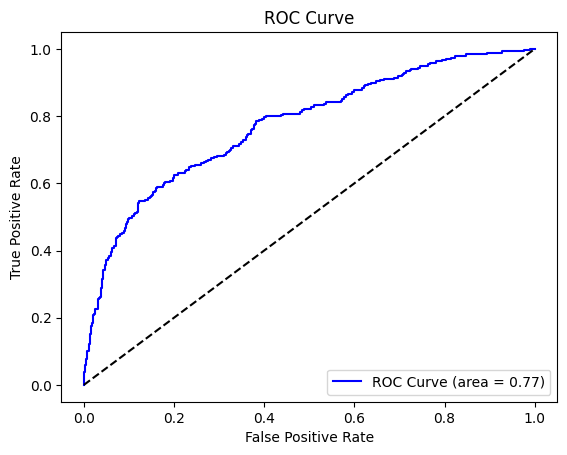

In [37]:
# Plot the ROC curve by giving appropriate names for title and axes
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(y_validation_classes, train_predictions[:,1])
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color = 'blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Is the accurancy value impressive for this dataset? Please explain based on the structure of this dataset.

For these five metrics (accuracy, precision, recall, F1 score and AUC), please explain their connections and differences. For our dataset, which metrics should we focus more on?

Ans- An accuracy of approximately 81% might seem high, but it's not necessarily impressive without context. If the dataset is imbalanced, then this metric can be misleading. An imbalanced dataset can cause a model to appear accurate when it's merely predicting the majority class.

Precision of around 58% indicates that when the model predicts a default, it is correct 58% of the time. Recall of 50% means that the model correctly identifies 50% of all actual defaults. These metrics are particularly important if the cost of false positives and false negatives is high. The F1 score of approximately 54% is the harmonic mean of precision and recall and is a better measure than accuracy for imbalanced datasets. However, a score of 54% indicates there is room for improvement, as it suggests that the balance between precision and recall is not optimal.

An AUC of 0.77 indicates moderate discrimination ability. It tells us how good the model is at distinguishing between clients who will default and those who won't. For the credit default prediction dataset, which likely has a high cost associated with false negatives, recall might be particularly important to focus on.

#### Tuning hyperparameters using cross-validation:<br/>
Cross-validation in neural networks is computationally expensive. So we will perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function.

Here, we will use KerasClassifier class, which act as a wrapper of scikit-learn’s library in Keras comes as a handy tool for automating the tuning process.

In [38]:
!pip install scikeras

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier

Q6. First we create a function to build neural network model with activation function and learning rate of SGD as parameters

In [40]:
# Build create_model function with activation function and learning rate of SGD as parameters
def create_model(learning_rate, activation):

    # Create an SGD optimizer with its learning rate equal to the "learning_rate" parameter value of create_model
    opt = SGD(learning_rate = learning_rate, decay=1e-7, momentum=.9)

    # Create your neural network model
    model = Sequential()
    # Please keep the same architecture as the NN model you have built above in order for comparison
    # Please use the activation given by the "activation" parameter value of create_model for all inner layers except for the final layer.
    # For the final output layer, choose an appropriate activation function by yourself.

    # First add fully-connected (Dense) hidden layers with appropriate input dimension
    model.add(Dense(units = 128, input_shape = (X_train.shape[1],), activation = activation))

    # Drop out layer
    model.add(Dropout(rate = 0.2))

    # Continues the process
    model.add(Dense(units = 256, activation=activation))
    model.add(Dropout(rate = 0.3))
    model.add(Dense(units = 512, activation=activation))
    model.add(Dropout(rate = 0.5))
    model.add(Dense(units = 256, activation=activation))
    model.add(Dropout(rate = 0.3))
    model.add(Dense(units = 128, activation=activation))
    model.add(Dropout(rate = 0.2))

    # Finally, add a readout layer
    model.add(Dense(units = 2, activation='softmax'))

    # Compile the model
    model.compile(optimizer = opt,
                  loss = 'categorical_crossentropy',
                  metrics=["accuracy"])
    return model

Create a model object using KerasClassifier from keras.wrappers.scikit_learn by passing the create_model function.

In [41]:
model = KerasClassifier(build_fn = create_model,
                       verbose = 0)

Q7. Try the following hyperparameters:

- activation function: relu, tanh

- batch size: 16, 32 and 64

- epochs: 100, 200 and 500

- learning rate: 0.01, 0.001 and 0.0001

Use dictionary object to define the parameter search space.

In [42]:
param_grid = {
    'model__learning_rate': [0.01, 0.001, 0.0001],
    'model__activation': ['relu', 'tanh'],
    'batch_size': [16, 32, 64],
    'epochs': [100, 200, 500]
}

Next we perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function. We select the randomized search as it works faster than a grid search. Here, we will perform a 5-fold cross-validation search.

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html?highlight=randomizedsearchcv#sklearn.model_selection.RandomizedSearchCV for the use of RandomizedSearchCV.

In [43]:
random_search = RandomizedSearchCV(estimator = model,
                                   param_distributions = param_grid,
                                   scoring = 'recall',
                                   cv = 5)

In [44]:
### Fit on the training data with all sets of parameters
random_search_results = random_search.fit(X_train, y_train_vector) # it may take several hours.

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classifica

Q8. Print the best model parameters

In [45]:
best_parameters = random_search_results.best_params_
print("Best Parameters:", best_parameters)

Best Parameters: {'model__learning_rate': 0.001, 'model__activation': 'relu', 'epochs': 100, 'batch_size': 32}


Q9. Fit the model with the Best Parameter Set

In [46]:
best_model = random_search_results.best_estimator_

Q10. Obtain predictions on validation set and print accuracy, precision, recall and F1 score.

In [47]:
train_predictions = best_model.predict(X_val)

predictions_classes = np.argmax(train_predictions, axis=1)
y_validation_classes = np.argmax(y_val_vector, axis=1)

train_accuracy = accuracy_score(y_validation_classes, predictions_classes)
train_precision = precision_score(y_validation_classes, predictions_classes)
train_recall = recall_score(y_validation_classes, predictions_classes)
train_f1_score = f1_score(y_validation_classes, predictions_classes)

print("Validation Set Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 score: {train_f1_score:.4f}")

Validation Set Metrics:
Accuracy: 0.8060
Precision: 0.5819
Recall: 0.5000
F1 score: 0.5378


Do you get a better accuracy/recall/precision/F1 score than the first NN model you have built in exercise 5? Explain.

Ans- After performing a randomized search cross-validation across the parameter space using RandomizedSearchCV function, our best model had slightly better accuracy, precision and F1 score whereas the recall was the same.

The trade-off between precision and recall (reflected by F1 score) depends on what's more important for the specific application of the model. In our case, the F1 score was slightly improved since precision improved while recall remained constant.

Overall, since our metrics did not drastically improve from the first NN model built in this exercise, this suggests that we could further tweak the architecture of the NN in terms of layers and units to get more desirable results. Also, the random nature of the randomized search cross-validation means that we may get different results each time. There is a tradeoff between computational time & accuracy of the model when we talk of model complexity and thoroughness of the grid search.

### Logistic Regression and Random Forest
In a real world scenario, you can try a number of algorithms for the same problem. Let us work with the same default payment dataset to produce Logistic Regression and Random Forest models.

Q11. Implement a function logistic_regression_model that returns a logistic regression model with the best parameters. You will use GridSearchCV to find the best parameters. The parameters search space is up to you. If there is any ConvergenceWarning, increase the number of iterations.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

def logistic_regression_model(X_train, y_train):
    model = LogisticRegression(max_iter = 500)

    param_grid = {
    'C': [0.1, 0.5, 1.0],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga'],
    }

    grid_search = GridSearchCV(estimator = model, scoring = 'recall', param_grid = param_grid,
                               cv = 3, n_jobs = -1, verbose = 2)

    ### Fit on the training data with all sets of parameters.
    grid_search.fit(X_train, y_train)

    return grid_search.best_estimator_ # Return a logistic model with the best parameters you found

Q12. Fit the model by training set, obtain predictions on validation set and compute accuracy, precision, recall and F1 score.

In [49]:
# fit the model
# compute accuracy,precision,recall on validation set

model_lr = logistic_regression_model(X_train, y_train)
model_lr.fit(X_train, y_train)

lr_pred = model_lr.predict(X_val)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 64, in _check_solver
    raise ValueError(
ValueError: Only '

In [50]:
print(f'Accuracy of best Logistic Regression model: {accuracy_score(y_val, lr_pred)}')
print(f'Precision of best Logistic Regression model: {precision_score(y_val, lr_pred)}')
print(f'Recall of best Logistic Regression model: {recall_score(y_val, lr_pred)}')
print(f'F-1 Score of best Logistic Regression model: {f1_score(y_val, lr_pred)}')

Accuracy of best Logistic Regression model: 0.8235785953177257
Precision of best Logistic Regression model: 0.6685714285714286
Recall of best Logistic Regression model: 0.43333333333333335
F-1 Score of best Logistic Regression model: 0.5258426966292136


Q13. Plot the ROC curve by giving appropriate names for title and axes.

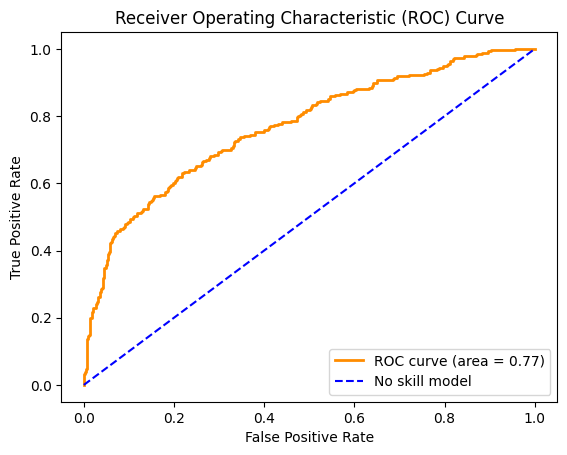

In [51]:
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics

y_val_prob = model_lr.predict_proba(X_val)[:,1]

# Compute ROC curve and ROC area
fpr, tpr, threshold = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr,tpr)

# Plotting the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color = 'blue', linestyle = '--', label = 'No skill model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Q14. Implement a function random_forest_model that returns a random forest model with the best parameters. You will apply GridSearchCV to find the best parameters. The parameter search space is up to you. (Please set the random state of RandomForestClassifier to be 26.)

In [52]:
from sklearn.ensemble import RandomForestClassifier

def random_forest_model(X_train, y_train):
    rf = RandomForestClassifier(random_state=26) # Please set the random state to be 26

    param_grid = {
    'max_depth': [10, 20, 30],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 7, 9],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 500]
    }

    grid_search = GridSearchCV(estimator = rf, scoring = 'recall', param_grid = param_grid,
                               cv = 3, n_jobs = -1, verbose = 2)

     ### Fit on the training data with all sets of parameters.
    grid_search.fit(X_train, y_train)

    return grid_search.best_estimator_ # Return a random forest model with the best parameters you found and random_state=26

Q15. Fit the model by training set, obtain predictions on validation set and compute accuracy, precision, recall and F1 score.

In [53]:
model_rf = random_forest_model(X_train, y_train)
model_rf.fit(X_train, y_train)

rf_pred = model_rf.predict(X_val)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


In [54]:
print(f'Accuracy of best Random Forest model: {accuracy_score(y_val, rf_pred)}')
print(f'Precision of best Random Forest model: {precision_score(y_val, rf_pred)}')
print(f'Recall of best Random Forest model: {recall_score(y_val, rf_pred)}')
print(f'F-1 Score of best Random Forest model: {f1_score(y_val, rf_pred)}')

Accuracy of best Random Forest model: 0.81438127090301
Precision of best Random Forest model: 0.6333333333333333
Recall of best Random Forest model: 0.4222222222222222
F-1 Score of best Random Forest model: 0.5066666666666666


Q16. Plot the ROC curve by giving appropriate names for title and axes.

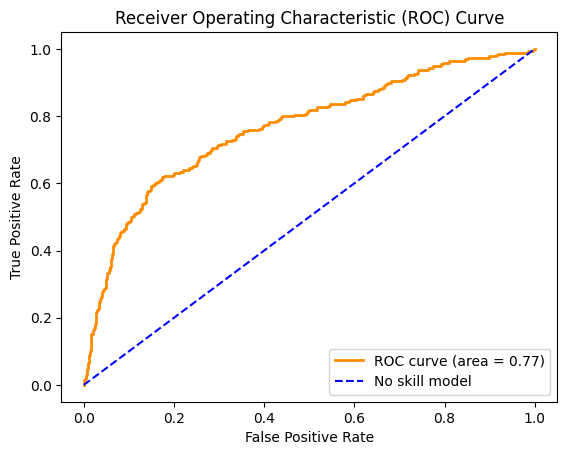

In [55]:
y_val_prob = model_rf.predict_proba(X_val)[:,1]

# Compute ROC curve and ROC area
fpr, tpr, threshold = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr,tpr)

# Plotting the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color = 'blue', linestyle = '--', label = 'No skill model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Q17: Which of the above 3 models (NN, Logistic function and random forest) worked best for you? Explain in details the reason for good/bad performance for each of the models?

In the context of the Credit Default dataset, we picked recall as the most important metric since we do not want to miss any default output due to the high cost of false negatives. In terms of recall, the NN performed best with 50% recall compared to the ~43% and ~42% recall values for logistic regression and random forest respectively.

The neural network has the ability to model complex non-linear relationships and it can also learn heirarchical features from data. This makes its performance the best out of all the three models.

In contrast, the logistic regression is limited in the sense that it only models the linear relationships between features and the target. Random forests, while having the ability to model non-linear relationships, are unable to model complex relationships as effectively as neural networks. This is why these two models do not perform as well as the neural network.

Ultimately, we could attempt to run more comprehensive grid searches for each of these models to further optimize the performance of each model. However, this would result in a considerable increase in computational time. Generally speaking, our results show that the NN performs considerably better than the other two models in terms of recall.




Using the best of the above 3 models, obtain predictions for the test set.

In [56]:
test_predictions = best_model.predict(X_test)
y_pred = np.argmax(test_predictions, axis=1)



---

